In [1]:
import torch
from utils import Args
from train import Training

# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [16,64,128,256]
B = [20,64,128,256]
L = [4,12,18,24]
h = [4,8,12,16]
d = [32,128,256,768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4,1e-3,1e-2,1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1,10,20,30]

#### Define Args list

In [3]:
args = Args(
    N[0],B[0],L[0],h[0],d[0],
    use_lr_decay[0],learning_rate[0],
    datasets_paths[0],max_iterations[0],
    out_dir=out_dir, val_int=30)

#### Train models

In [ ]:
training = Training(args)
model, losses = training.train_model()
print(losses.keys())
print(losses['validation'])

#### Cross validation

In [4]:
training_cross = Training(args)
models, train_loss, val_loss = training_cross.cross_validation(k_fold=5)

---------------------------------
Fold n°0
train indices: [0,0),[111538,1115381), test indices: [0,111538)
train indices: [0,0),[111538,1115381), test indices: [0,111538)
Epoch: 0, Batch 29, Training Loss: 4.3871, Validation Loss: 4.3198
Epoch: 0, Batch 59, Training Loss: 4.1928, Validation Loss: 4.2000
Epoch: 0, Batch 89, Training Loss: 4.0869, Validation Loss: 4.0315
---------------------------------
Fold n°1
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
Epoch: 0, Batch 29, Training Loss: 4.3569, Validation Loss: 4.2970
Epoch: 0, Batch 59, Training Loss: 4.2189, Validation Loss: 4.1732
Epoch: 0, Batch 89, Training Loss: 4.0494, Validation Loss: 3.9913
---------------------------------
Fold n°2
train indices: [0,223076),[334614,1115381), test indices: [223076,334614)
train indices: [0,223076),[334614,1115381), test indices: [223076,334614)
Epoch: 0, Batch 29, Training Loss: 4.3117, Va

#### Results

In [5]:
print(train_loss.size()) # 5 folds, 100 grad updates e.g. 5 x 100 matrix.
print(val_loss.size())   # 5 folds, log every 100 grad updates e.g. 5 x 1 matrix
print(val_loss)

torch.Size([5, 100])
torch.Size([5, 3])
tensor([[4.3198, 4.2000, 4.0315],
        [4.2970, 4.1732, 3.9913],
        [4.3175, 4.2089, 4.0640],
        [4.2780, 4.1626, 3.9951],
        [4.4179, 4.2858, 4.0783]])


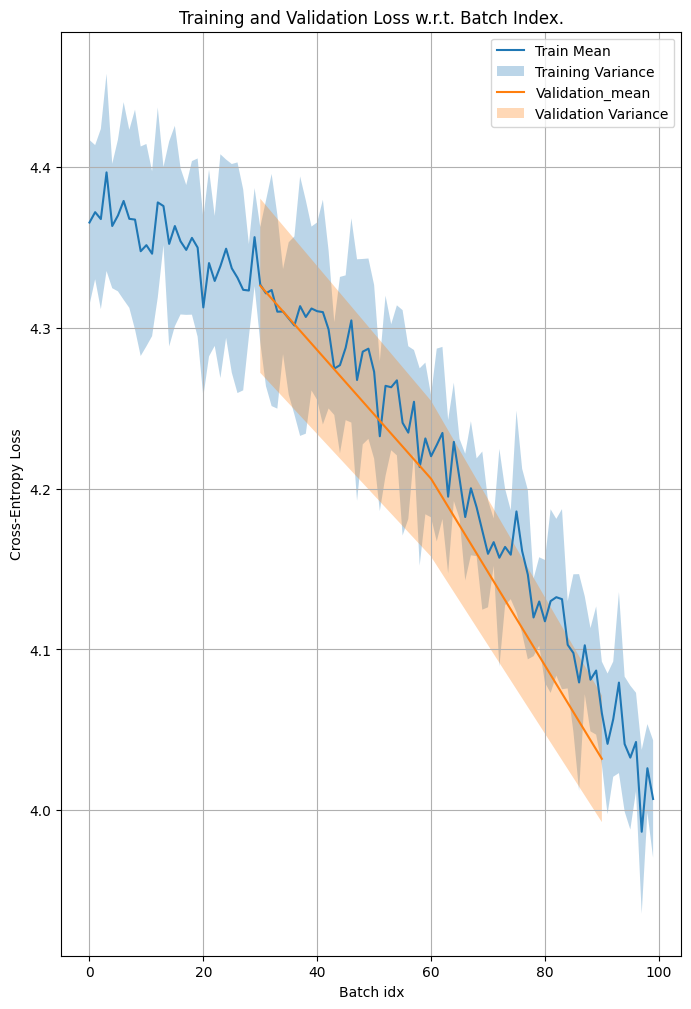

In [6]:
training_cross.losses_graph()

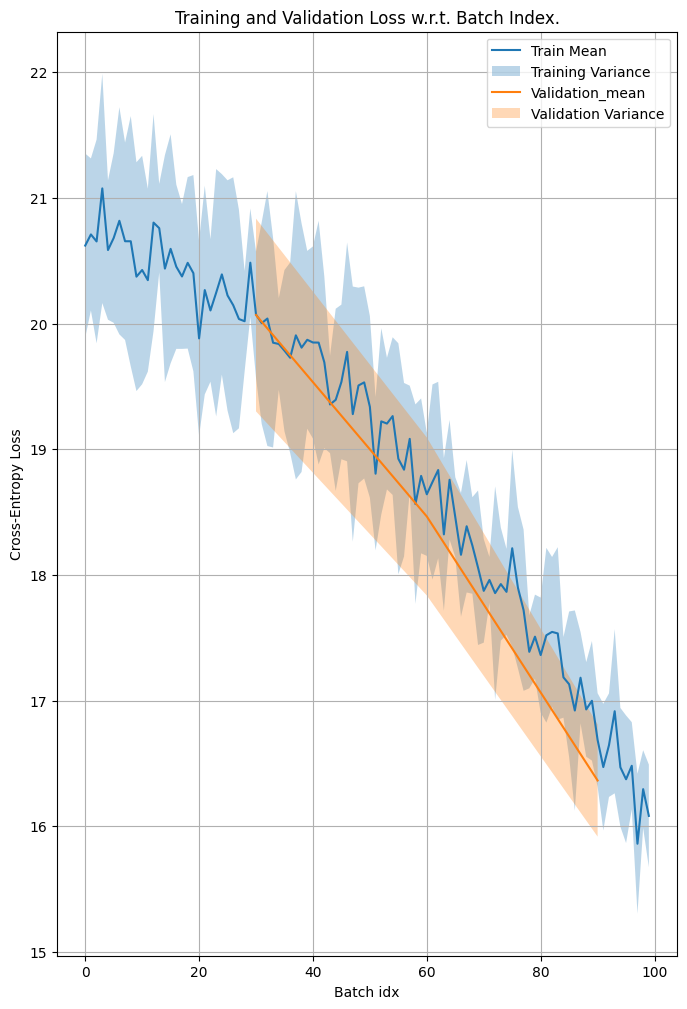

In [7]:
training_cross.perplexity_graph()